In [6]:
## LGBTQ Data

In [7]:
import numpy as np
import pandas as pd

In [27]:
lgbtq_p = pd.read_excel('lgbtqdata.xlsx', usecols = [0, 1, 10, 11 , 12, 13, 14, 15, 16, 17],
                       header = 1, skiprows = ([i for i in range(1, 4)] + [j for j in range(5, 282)] + [k for k in range (314, 336)])) 

# renaming 'Area name' to 'Borough'
lgbtq_p.rename(columns={'Area name': 'Borough'}, inplace=True)


In [28]:
lgbtq_p.head(5)

,Area code,Borough,Straight or Heterosexual\n(percent),Gay or Lesbian\n(percent),Bisexual\n(percent),Pansexual\n(percent),Asexual\n(percent),Queer\n(percent),All other sexual orientations\n(percent),Not answered\n(percent)
0,E09000002,Barking and Dagenham,88.58,0.82,0.97,0.38,0.03,0.01,0.07,9.14
1,E09000003,Barnet,87.27,1.25,1.06,0.36,0.05,0.03,0.04,9.94
2,E09000004,Bexley,90.92,1.05,0.81,0.18,0.03,0.02,0.02,6.97
3,E09000005,Brent,85.10,1.31,1.29,0.45,0.04,0.03,0.07,11.70
4,E09000006,Bromley,89.98,1.53,0.95,0.16,0.05,0.03,0.02,7.30


In [29]:
lgbtq_p.tail(5)

,Area code,Borough,Straight or Heterosexual\n(percent),Gay or Lesbian\n(percent),Bisexual\n(percent),Pansexual\n(percent),Asexual\n(percent),Queer\n(percent),All other sexual orientations\n(percent),Not answered\n(percent)
27,E09000029,Sutton,89.95,1.17,0.97,0.19,0.04,0.01,0.01,7.65
28,E09000030,Tower Hamlets,83.07,3.96,2.52,0.46,0.06,0.13,0.04,9.76
29,E09000031,Waltham Forest,85.99,2.26,1.62,0.44,0.05,0.09,0.05,9.49
30,E09000032,Wandsworth,86.47,3.05,1.74,0.26,0.06,0.05,0.03,8.34
31,E09000033,Westminster,83.31,3.47,1.54,0.33,0.06,0.05,0.04,11.20


In [30]:
import os
import re
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

import matplotlib.cm as cm
import matplotlib.pyplot as plt

from kneed import knee_locator
from scipy import stats

df_types = lgbtq_p.dtypes
print(df_types)

Area code                                    object
Borough                                      object
Straight or Heterosexual\n(percent)         float64
Gay or Lesbian\n(percent)                   float64
Bisexual\n(percent)                         float64
Pansexual\n(percent)                        float64
Asexual\n(percent)                          float64
Queer\n(percent)                            float64
All other sexual orientations\n(percent)    float64
Not answered\n(percent)                     float64
dtype: object


In [31]:
import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer
from sklearn.cluster import KMeans, DBSCAN, OPTICS

In [32]:
from umap import UMAP

keep_dims=2
rs=42

u = UMAP(
    n_neighbors=25,
    min_dist=0.01,
    n_components=keep_dims,
    random_state=rs)

<AxesSubplot:xlabel='Straight or Heterosexual\n(percent)', ylabel='Gay or Lesbian\n(percent)'>

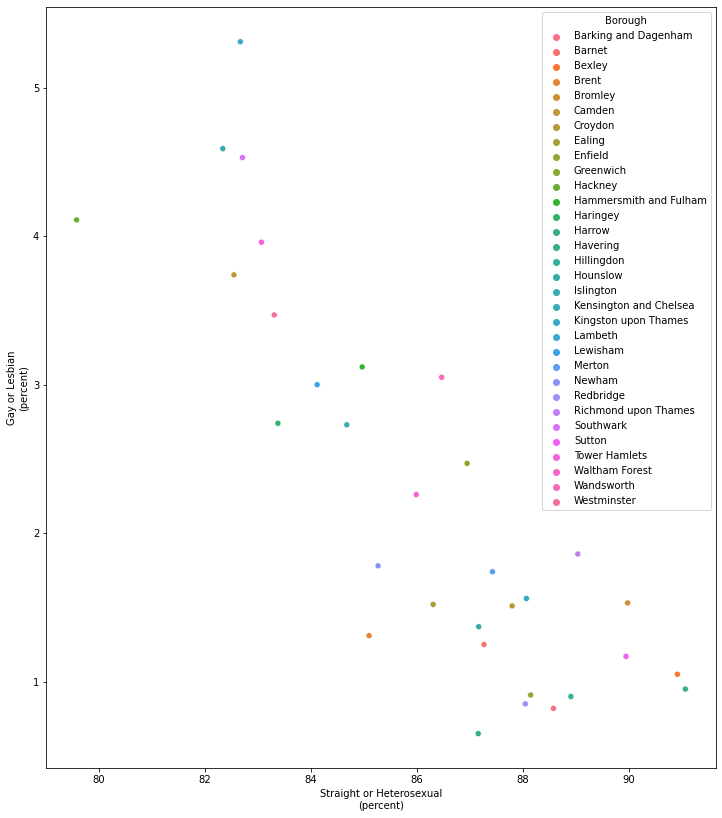

In [35]:
f,ax = plt.subplots(1,1,figsize=(12,14))
sns.scatterplot(x=lgbtq_p['Straight or Heterosexual\n(percent)'], y=lgbtq_p['Gay or Lesbian\n(percent)'], hue=lgbtq_p['Borough'], legend=True, ax=ax)

In [36]:
lgbtq_p['LGBTQ+\n(percent)'] = lgbtq_p['Bisexual\n(percent)'] + lgbtq_p['Pansexual\n(percent)'] + lgbtq_p['Asexual\n(percent)'] + lgbtq_p['Queer\n(percent)'] + lgbtq_p['All other sexual orientations\n(percent)']

<AxesSubplot:xlabel='Straight or Heterosexual\n(percent)', ylabel='LGBTQ+\n(percent)'>

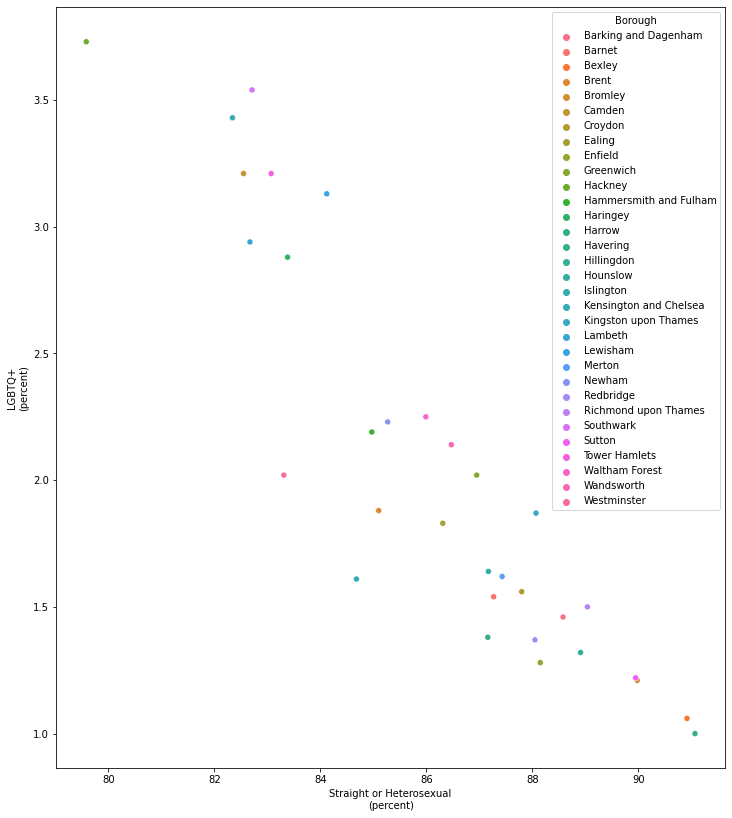

In [37]:
f,ax = plt.subplots(1,1,figsize=(12,14))
sns.scatterplot(x=lgbtq_p['Straight or Heterosexual\n(percent)'], y=lgbtq_p['LGBTQ+\n(percent)'], hue=lgbtq_p['Borough'], legend=True, ax=ax)

In [38]:
mapping = {}
for b in ['Barnet', 'Enfield', 'Haringey']:
    mapping[b]='North'
for b in ['Brent', 'Ealing', 'Hammersmith and Fulham',
          'Harrow', 'Hillingdon', 'Hounslow', 'Richmond upon Thames']:
    mapping[b]='West'
for b in ['Camden', 'Islington','Kensington and Chelsea', 'Lambeth', 'Southwark', 'Westminster']:
    mapping[b]='Central'
for b in ['Bromley','Croydon','Kingston upon Thames', 'Merton', 'Sutton', 'Wandsworth']:
    mapping[b]='South'
for b in ['Barking and Dagenham', 'Bexley', 'Greenwich', 'Hackney', 'Havering', 'Lewisham', 'Newham', 
          'Redbridge', 'Tower Hamlets', 'Waltham Forest']:
    mapping[b]='East'

lgbtq_p['Subregion'] = lgbtq_p.Borough.apply(lambda x: mapping[x])

In [88]:
# Keywords
kwds = dict(s=10,alpha=0.95,edgecolor="none")

# Color palette 
sns.set_palette(sns.color_palette("inferno"))

#Subregion hues
sr_hue = ['North', 'West', 'Central', 'South', 'East']

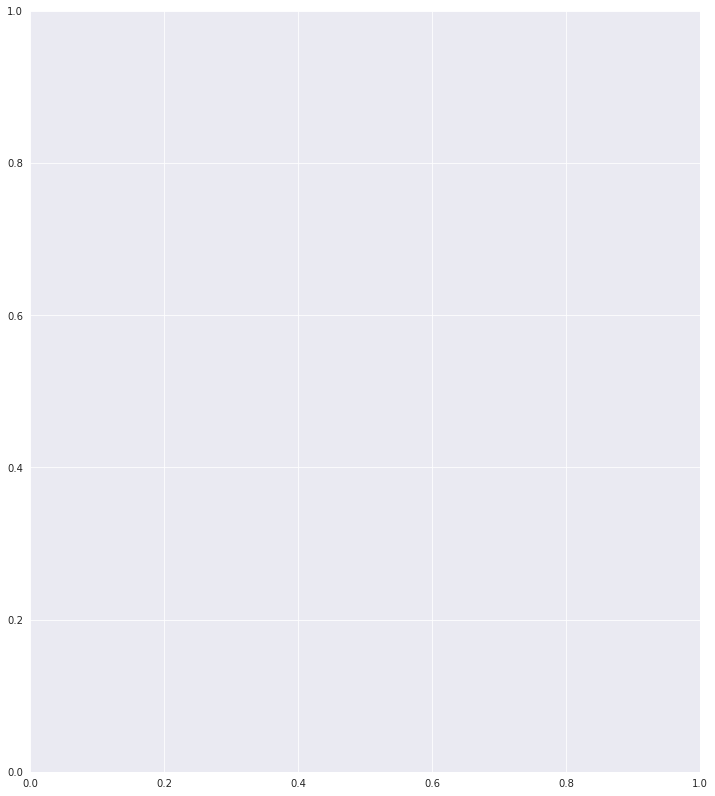

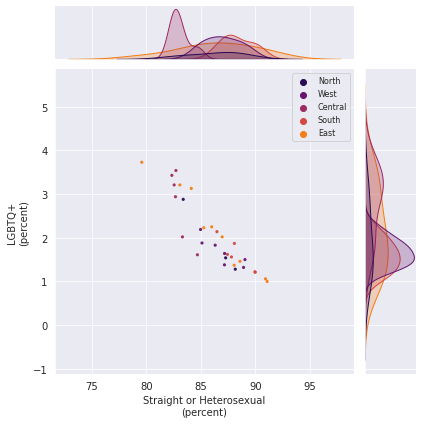

In [94]:
g,ax = plt.subplots(1,1,figsize=(12,14))
g = sns.jointplot(data=lgbtq_p, x='Straight or Heterosexual\n(percent)', y='LGBTQ+\n(percent)', height=6, 
                  hue='Subregion', hue_order=sr_hue, joint_kws=kwds, ax=ax)
g.ax_joint.legend(loc='upper right', prop={'size': 8});

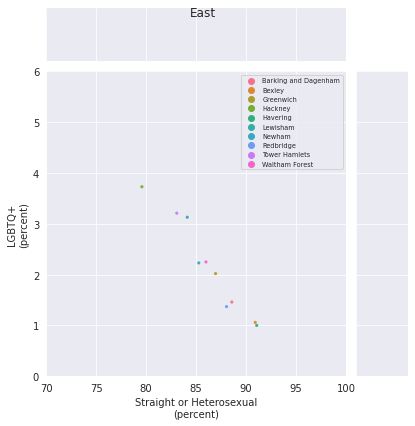

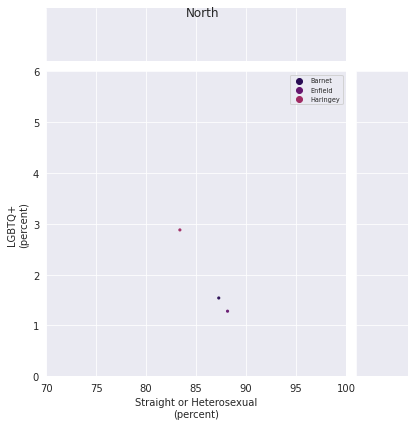

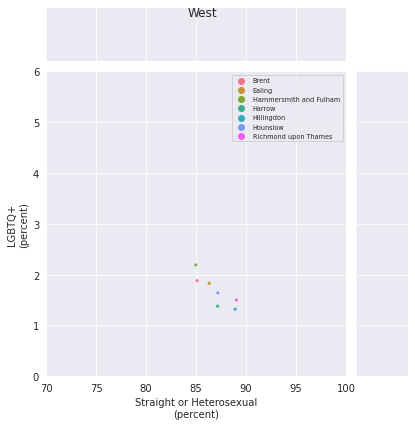

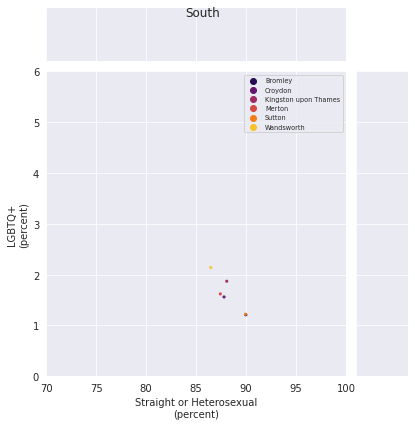

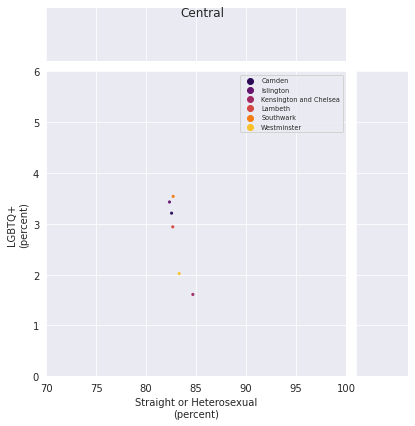

In [ ]:
for l in lgbtq_p.Subregion.unique():
    g = sns.jointplot(data=lgbtq_p[lgbtq_p.Subregion==l], x='Straight or Heterosexual\n(percent)', 
                      y='LGBTQ+\n(percent)', hue='Borough', joint_kws=kwds)
    g.ax_joint.legend(loc='upper right', prop={'size': 6.5});
    g.ax_joint.set_ylim(0,6)
    g.ax_joint.set_xlim(70,100)
    plt.suptitle(l)